<a href="https://colab.research.google.com/github/SampathPatil0/DSML_Projects/blob/main/Jamboree_Linear_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Definition & Statement :**

Jamboree is an educational platform that has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.


They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

We have build an linear regression model which will help the students to check their chances of getting into good colleges.


**Columns Profiling**

**Serial Number (Serial No.)**: A unique identifier assigned to each student, represented as an integer.

**GRE Score**: The score obtained in the GRE test on a scale of 0 to 340, recorded as an integer.

**TOEFL Score**: The score achieved in the TOEFL test on a scale of 0 to 120, presented as an integer.

**University Rating**: The rating of the university, assessed on a scale of 0 to 5 and expressed as an integer.

**Strength of Statement of Purpose and Letter of Recommendation (SOP)**: The strength of the recommendation letter or Statement of Purpose (SOP), evaluated on a scale of 0 to 5 and denoted as a floating-point number.

**Undergraduate GPA (CGPA)**: The grade earned in the undergraduate program, measured on a scale of 0 to 10 and presented as a floating-point number.

**Research Experience**: Indicates whether the student possesses any research experience, represented as either 0 or 1 and recorded as an integer.

**Chance of Admission (Chance of Admit)**: The likelihood of securing admission, varying from 0 to 1 and indicated as a floating-point number.

In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
!gdown "1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4"

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Admission_Predict_Ver1.1.csv
100% 16.2k/16.2k [00:00<00:00, 29.1MB/s]


In [ ]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

# **Exploratory Data Analysis**

In [ ]:
df.head() #displays the top 5 rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail() #displays the bottom 5 rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
df.shape #checking the number of rows and columns

(500, 9)

In [ ]:
df.dtypes #checking the data types

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
df.describe() #displays the statistical summary of all the fields

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.info() #displays the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum() #checking the missing values in each field

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.isnull().sum().sum() #checking the overall missing values

0

In [ ]:
df.drop(columns = 'Serial No.',inplace=True) #dropping the Serial No field as this is not important for the analysis

In [ ]:
df.rename(columns = {"LOR ":"LOR","Chance of Admit ":"Chance of Admit"},inplace=True) #renamed LOR and Chance of Admit fields as there exists some extra space in the end

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# **Univariate Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Below graphs shows the distribution of the numerical measures. KDE plot draws a curvy line that gives an idea of how the data is spread.

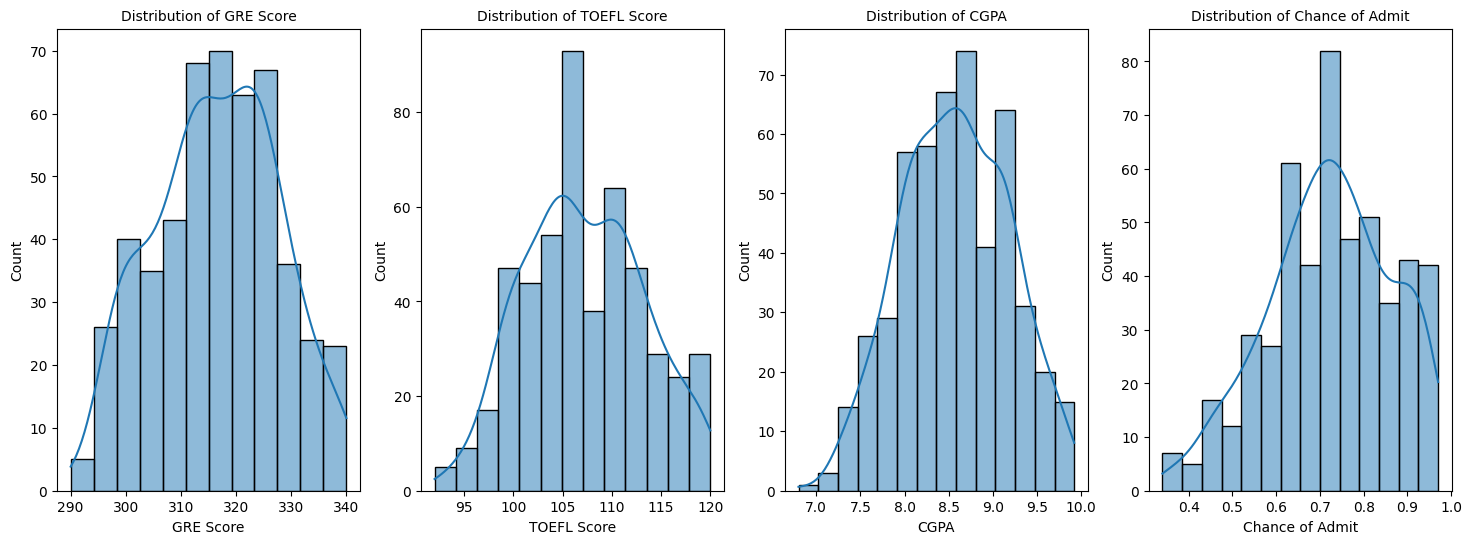

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
sns.histplot(df["GRE Score"], kde=True)
plt.title("Distribution of GRE Score",fontsize=10)

plt.subplot(1,4,2)
sns.histplot(df["TOEFL Score"], kde=True)
plt.title("Distribution of TOEFL Score",fontsize=10)

plt.subplot(1,4,3)
sns.histplot(df["CGPA"], kde=True)
plt.title("Distribution of CGPA",fontsize=10)

plt.subplot(1,4,4)
sns.histplot(df["Chance of Admit"], kde=True)
plt.title("Distribution of Chance of Admit",fontsize=10)

plt.show()

**Observations:**

1. From the histplot, we can see that student with CGPA between 8-9.25 applies the most.

2. CGPA and GRE Scores hold the approx. normally distributed curve


3. Most of the students GRE Score is between 312 to 328



Checking the Outiers

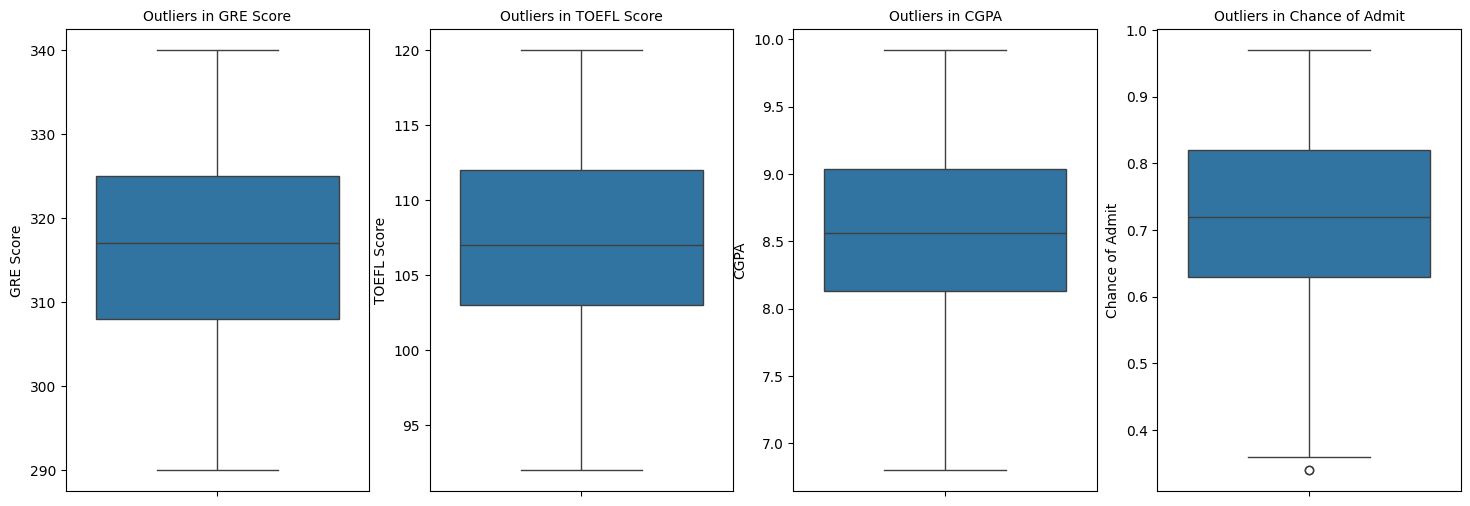

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
sns.boxplot(df["GRE Score"])
plt.title("Outliers in GRE Score",fontsize = 10)

plt.subplot(1,4,2)
sns.boxplot(df["TOEFL Score"])
plt.title("Outliers in TOEFL Score",fontsize = 10)

plt.subplot(1,4,3)
sns.boxplot(df["CGPA"])
plt.title("Outliers in CGPA",fontsize = 10)

plt.subplot(1,4,4)
sns.boxplot(df["Chance of Admit"])
plt.title("Outliers in Chance of Admit",fontsize = 10)

plt.show()

**Observation:**

1. From the above graph we can conclude that chance of admit field has some outlier in it.


# **Categorical Variables Distribution**

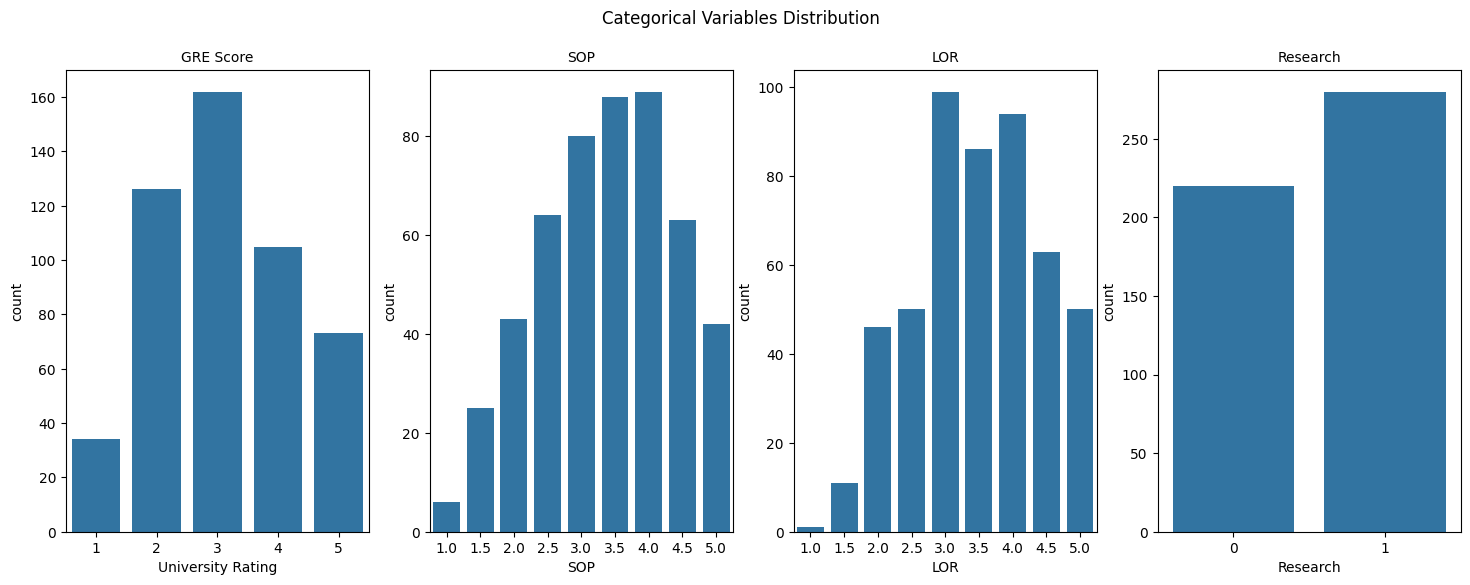

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
sns.countplot(data= df, x= "University Rating")
plt.title("GRE Score",fontsize = 10)

plt.subplot(1,4,2)
sns.countplot(data= df, x= "SOP")
plt.title("SOP",fontsize = 10)

plt.subplot(1,4,3)
sns.countplot(data= df, x= "LOR")
plt.title("LOR",fontsize = 10)

plt.subplot(1,4,4)
sns.countplot(data= df, x= "Research")
plt.title("Research",fontsize = 10)

plt.suptitle("Categorical Variables Distribution")
plt.show()


**Observation:**

1. There is no see significant difference of Students getting into top college even though they do not have any Research Papers done.

2. Letter of Recommendation plays a huge role in getting into top college where having LOR >= 3.0 have the high chances of admission.


# **Bivariate Analysis**

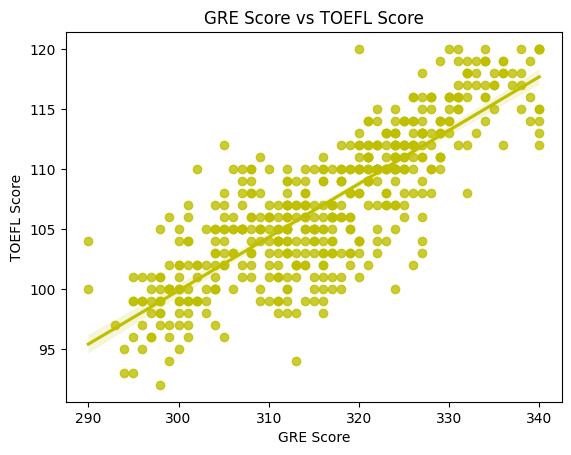

In [ ]:
sns.regplot(x="GRE Score",y="TOEFL Score",color="y",data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

**Observation:**

1. People with higher GRE Score also have higher TOEFL Score.
2. It holds for Linear Regression assumption : "Linearity of Variables"

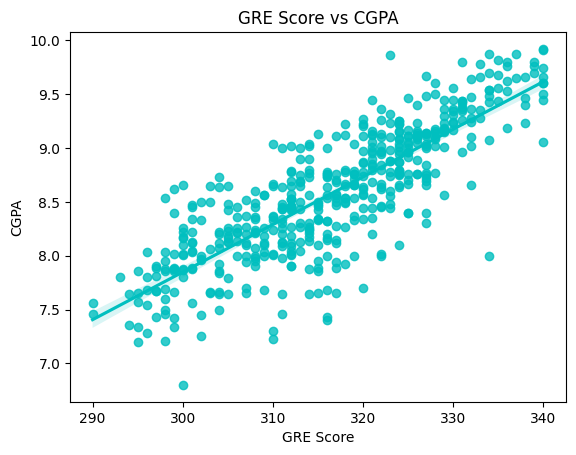

In [ ]:
sns.regplot(x="GRE Score",y="CGPA",color="c",data=df)
plt.title("GRE Score vs CGPA")
plt.show()

**Observation:**

1. We can see that people with higher CGPA has higher GRE Score may be they are smart or hard working
2.It holds for Linear Regression assumption : "Linearity of Variables"

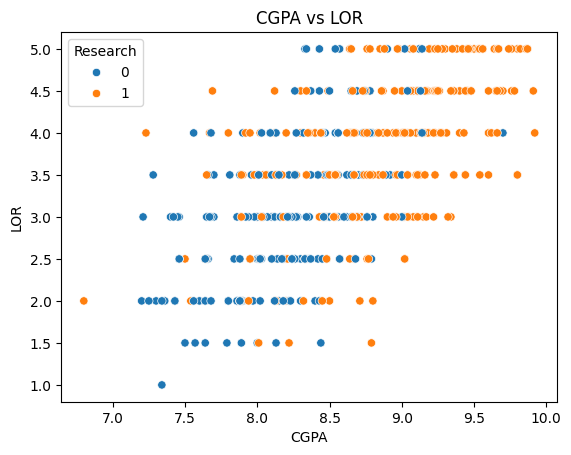

In [ ]:
sns.scatterplot(x="CGPA",y="LOR",data=df,hue="Research")
plt.title("CGPA vs LOR")
plt.show()

**Observation:**

1. There is no relationship between CGPA and LOR. It is clear that the students LOR is not dependent on the academic scores.
2.Students with research background/experience have good LOR which means that supervisors are more interested towrds students with research experience.

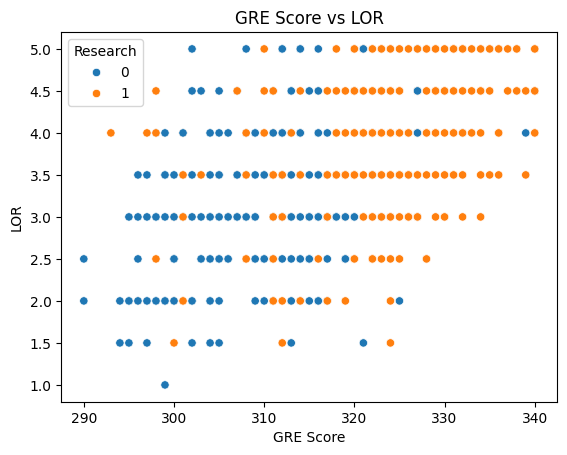

In [ ]:
sns.scatterplot(x="GRE Score",y="LOR",data=df,hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

**Observation:**

1. There is no relationship between GRE Score and LOR.

# **Correlation Among Variables**

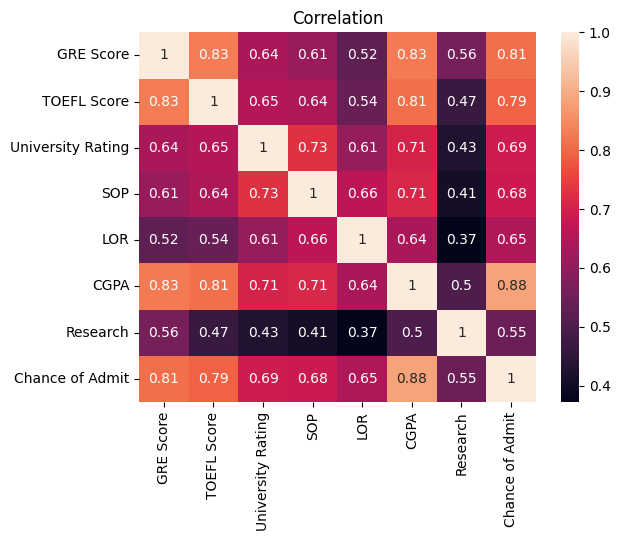

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation")
plt.show()

**Observation:**

There is a high correlation between:

1. TOEFL score and GRE score.
2. Chance of admit and TOEFL score.
3. TOEFL score and CGPA.
4. GRE score and Chance of admit.
5. Chance of admit and GRE score.
6. CGPA and GRE score.
7. Chance of admit and CGPA.

# **Data Preprocessing**

In [ ]:
df.duplicated().sum() #checking duplicate values

0

In [ ]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# **Splitting data into Train and Test**

In [ ]:
x = df.drop("Chance of Admit",axis=1)  #removing the target field from the input data
y = df["Chance of Admit"] #assigning the target field to the y variable

In [ ]:
from sklearn.model_selection import train_test_split



*   x_train: It contains the independent features of the training dataset
*   x_test: It contains the independent features of the testing dataset


*   y_train: It contains the dependent features of the training dataset
*   y_test: It contains the dependent features of the testing dataset


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [ ]:
print(x_train.shape) #checking the shape of the input
print(x_test.shape) #checking the shape of the

(400, 7)
(100, 7)


# **Scaling the features**

Scaling is very important in linear regression. As we see features with different scales, it is very important to scale the features and bring them to a same range. If we don't scale the features then there might be chances that the feature with higher scale might dominate the feature with lesser scale.

There are two ways to do scaling:


*   Standardization: It is used when the distribution of the features are normal.It transforms the data to have a mean of 0 and standard deviation of 1.
*   Min-Max: It is used when the distribution of the features are not normal.It transforms the data between a range of 0 to 1



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train_columns = x_train.columns
std = StandardScaler()
x_train_std = std.fit_transform(x_train)

In [ ]:
x_train_std

array([[-0.53736015, -0.51949116, -0.05463584, ...,  0.00933125,
        -0.32658176, -1.11114215],
       [ 0.16363964,  0.44925692, -1.8029826 , ...,  0.00933125,
        -0.04593523,  0.89997486],
       [-1.41360989, -1.0038652 , -0.05463584, ..., -1.05709751,
        -1.13550409, -1.11114215],
       ...,
       [ 0.77701445, -0.03511712, -0.05463584, ...,  0.00933125,
         0.89505605,  0.89997486],
       [ 0.86463943,  0.61071493,  1.69371093, ...,  0.54254563,
         1.09315948,  0.89997486],
       [-1.41360989, -0.35803314, -1.8029826 , ..., -1.59031189,
        -1.26757304, -1.11114215]])

In [ ]:
x_train = pd.DataFrame(x_train_std,columns = x_train_columns)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.537360,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,-1.111142
1,0.163640,0.449257,-1.802983,-0.845045,0.009331,-0.045935,0.899975
2,-1.413610,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,-1.111142
3,-1.413610,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,0.899975
4,0.514140,-0.519491,-0.054636,0.140430,0.542546,0.449323,0.899975
...,...,...,...,...,...,...,...
395,-0.800235,0.449257,0.819538,0.633168,1.075760,-0.326582,-1.111142
396,0.426515,0.610715,1.693711,1.618644,1.608974,1.456349,0.899975
397,0.777014,-0.035117,-0.054636,-0.352308,0.009331,0.895056,0.899975
398,0.864639,0.610715,1.693711,1.125906,0.542546,1.093159,0.899975


# **Checking the performance of the model using different algorithms without removing the features with multicollinearity**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [ ]:
models = [['Linear Regression :', LinearRegression()],
          ['Lasso Regression :', Lasso(alpha=0.1)],
           ['Ridge Regression :', Ridge(alpha=1.0)]
]

for name,model in models:
  model.fit(x_train, y_train.values)
  predictions = model.predict(std.transform(x_test))
  print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Linear Regression : 0.0588141045765077
Lasso Regression : 0.11793103455563166
Ridge Regression : 0.058831256119647915


The RMSE is a measure of the differences between actual values and the predicted values. A lower RMSE indicates better predictive performance which means that the model's predictions are closer to the actual values.It seems that both Linear Regression and Ridge Regression models perform similarly well, with Lasso Regression performing slightly poor.

# **Linear Regression performance metric**



*   R_square metric is used to measure the performance of the linear regression model. It resumbes the goodness of the fit.
*   The values ranges from 0 to 1



In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r_square = r2_score(y_test , y_pred)

# **Linear Regression using Statsmodel**


*   Adjusted r_square is the modified version of the r_square.
*   The values will be less than or equal to r_square

Formula: 1 - (1-r_square)(n-1) / n-k-1

Where,
     k is the number of features
     n is the number of observations



*   OLS methos provides statistical summary of the overall performance data.



In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train.values, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 19 May 2024   Prob (F-statistic):          2.10e-142
Time:                        12:03:18   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

We have to drop the SOP field and the check the values once again as the SOP has a p-value greater than 0.05

In [ ]:
x_train_new = x_train.drop(columns = "SOP")

In [ ]:
model1 = sm.OLS(y_train.values, x_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.1
Date:                Sun, 19 May 2024   Prob (F-statistic):          1.38e-143
Time:                        12:03:19   Log-Likelihood:                 559.10
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

# **Multicollinearity check using VIF (Variance Inflation Factor)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

print(vif_data)

             feature          VIF
0          GRE Score  1504.894810
1        TOEFL Score  1243.502370
2  University Rating    21.590945
3                SOP    35.444504
4                LOR    31.733871
5               CGPA  1238.095755
6           Research     3.251300
7    Chance of Admit   117.117817


In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(x_train_new, columns=x_train_new.columns)
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,GRE Score,4.85
5,CGPA,4.57
2,TOEFL Score,4.20
3,University Rating,2.37
4,LOR,1.90
6,Research,1.51
0,const,1.00


**Inferences**

*   From the above graph we can notice that the spread is linear in nature which means that there exists a linear relationship between y_test and y_pred

VIF looks good as the value is less than 5 for all the fields which indicates that there is no multicollinearity.


*   If the VIF value > 10 then remove the field
*   If the VIF value is between 5 to 10 then its good remove the field


*   If the VIF value is < 5 then good to proceed further without removing it.


# **Scaling on the test data**

In [ ]:
x_test_std = std.transform(x_test)
x_test = pd.DataFrame(x_test_std,columns = x_train_columns)

In [ ]:
x_test = sm.add_constant(x_test)

Since we have dropped SOP from the training data, we have to drop SOP from the test data too.

In [ ]:
x_test_del=list(set(x_test.columns).difference(set(x_train_new.columns))) #converting the dataframe to list and then taking the set differnce to find out the mismatched field

In [ ]:
x_test_new = x_test.drop(columns = x_test_del)

In [ ]:
x_test_new.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,-0.274485,-0.196575,-0.928809,-1.590312,-0.227530,-1.111142
1,1.0,-0.362110,-0.035117,-0.054636,-0.523883,-0.178004,0.899975
2,1.0,2.003764,1.902379,1.693711,0.542546,1.869065,-1.111142
3,1.0,-0.011610,-0.035117,-0.928809,0.009331,0.119151,0.899975
4,1.0,0.777014,0.449257,0.819538,0.542546,0.647427,0.899975


# **Performing predictions on the clean data**

In [ ]:
pred = model1.predict(x_test_new)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.04015279899204366
Root Mean Square Error  0.05871733986143244


# **Mean of Residuals**

In [ ]:
residuals = y_test.values - pred
mean_residuals = np.mean(residuals)
mean_residuals

-0.005690612755533338

In [ ]:
abs(residuals.mean())

0.005690612755533338

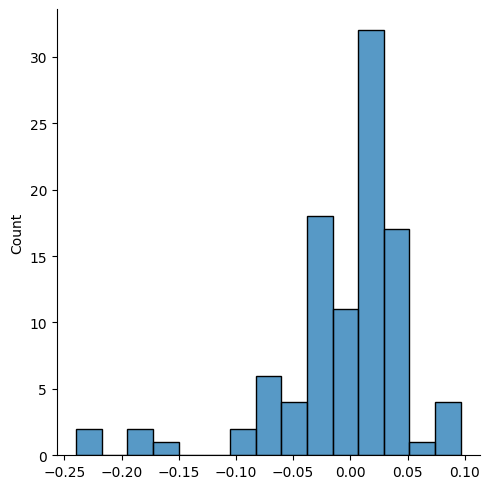

In [ ]:
sns.displot(residuals)

<Axes: ylabel='Density'>

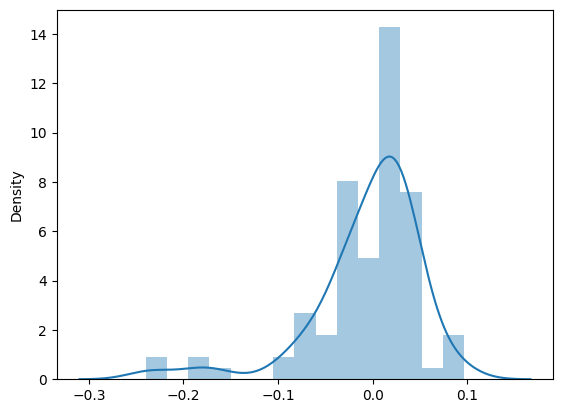

In [ ]:
sns.distplot(residuals,kde=True)

# **Linearity of Variables**

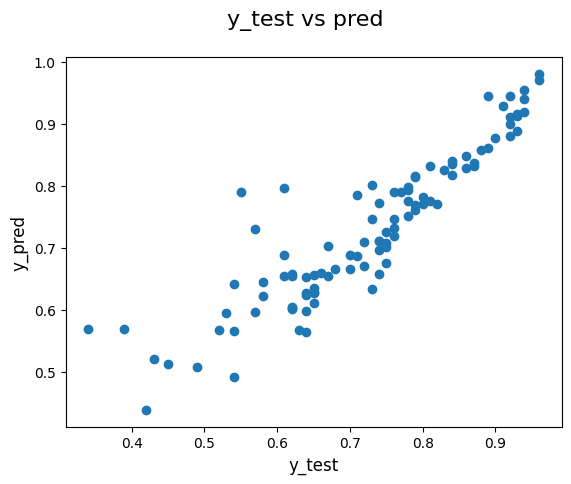

In [ ]:
plt.scatter(y_test,pred)
plt.suptitle('y_test vs pred', fontsize=16)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()

***Inferences***

*   From the above graph we can notice that the spread is linear in nature which means that there exists a linear relationship between y_test and y_pred

<Axes: xlabel='None', ylabel='None'>

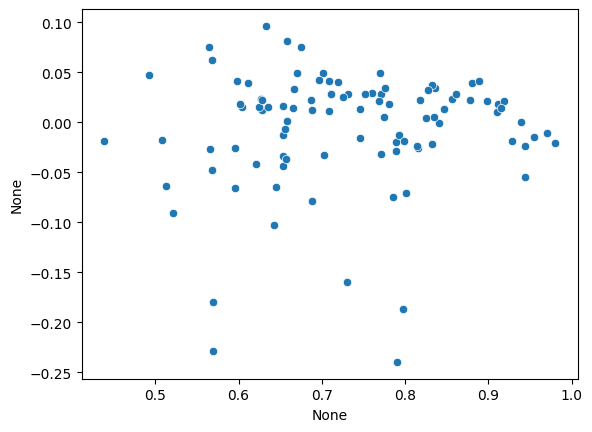

In [ ]:
sns.scatterplot(x=pred,y=residuals)

(0.0, 1.0)

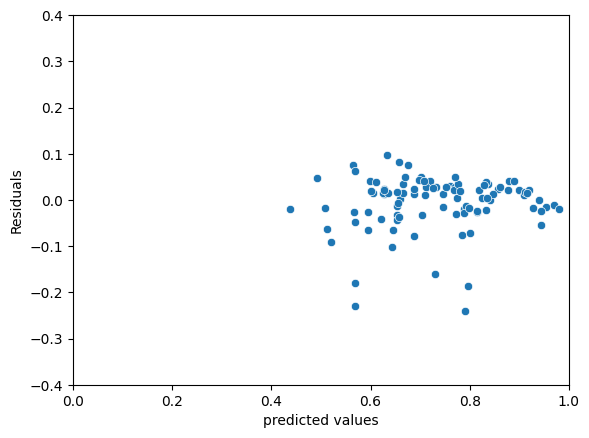

In [ ]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
#p = sns.lineplot([0,26],[0,0],color='blue')

# **Model Performance Evaluation**

In [ ]:
r2 = r2_score(y_test,pred).round(2)
mae = mean_absolute_error(y_test,pred).round(2)
mse = mean_squared_error( y_test, pred ).round(3)
rmse = np.sqrt( mean_squared_error( y_test, pred )).round(2)
mape = mean_absolute_percentage_error(y_test,pred).round(2)

In [ ]:
print("The R-Squared value is:",r2)
print("The Mean Absolute Error is:",mae)
print("The Mean Squared Error is:",mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mape)

The R-Squared value is: 0.82
The Mean Absolute Error is: 0.04
The Mean Squared Error is: 0.003
The Root Mean Squared Error is: 0.06
The Mean Absolute Percentage Error is: 0.07


# **Conclusion**


*   A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).
*   The chance of getting admission in top rated universities mostly depends on CGPA, as verified by correlation heatmap and other techniques, thus focusing on CGPA will highly increase the chance of getting into top rated universities.
*   More than 50% of the data has a university rating of 3 or 2

**Key features which influence the chance of Admit are:**

*   GRE Score
*   TOEFL Score
*   CGPA
*   LOR with > 4


# **Recommendations**



*    If the predicted chances of admission are low, then students should try to change the university and check if the chances of admission are higher in some other university.
*   Students must focus towards research along with academics.
*   The higher value of SOP and LOR will also increase the chances of admission.



